In [2]:
import matplotlib.pyplot as plt

from data import get_data
from reduction.PCA import pca, plot_explained_var


%load_ext autoreload
%autoreload 2

# PCA

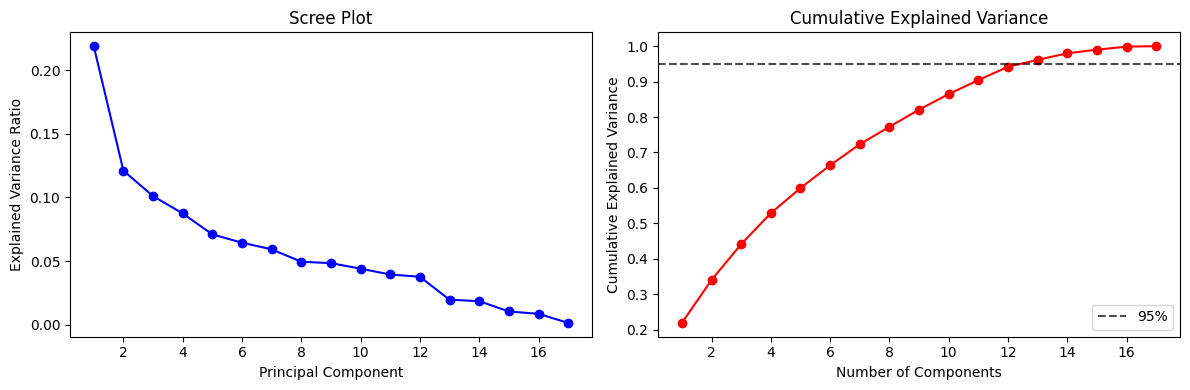

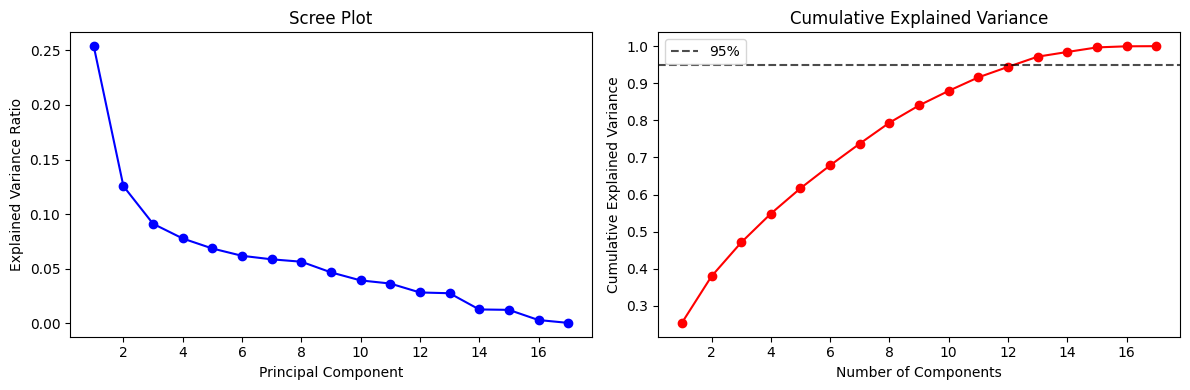

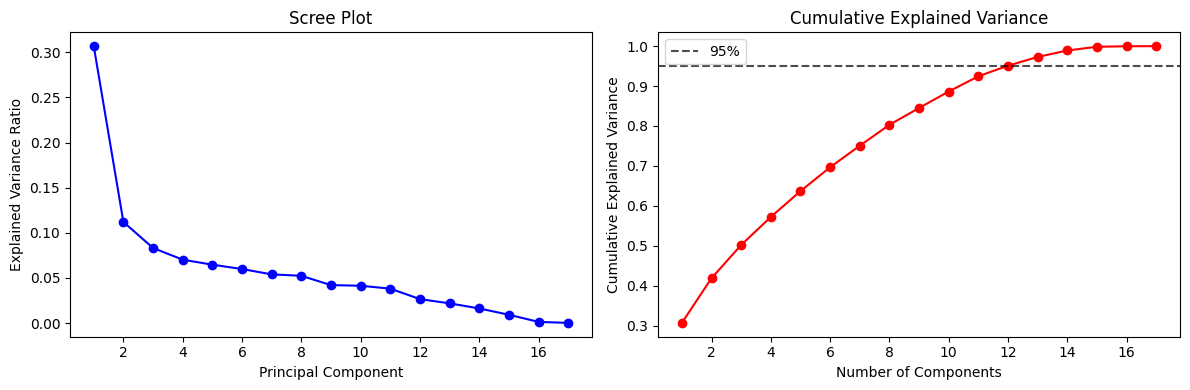

In [3]:
df_c1, X_c1 = get_data(channel=1)
fig = plot_explained_var(X_c1)
plt.show()

df_c2, X_c2 = get_data(channel=2)
fig = plot_explained_var(X_c2)
plt.show()

df, X = get_data()
fig = plot_explained_var(X)
plt.show()

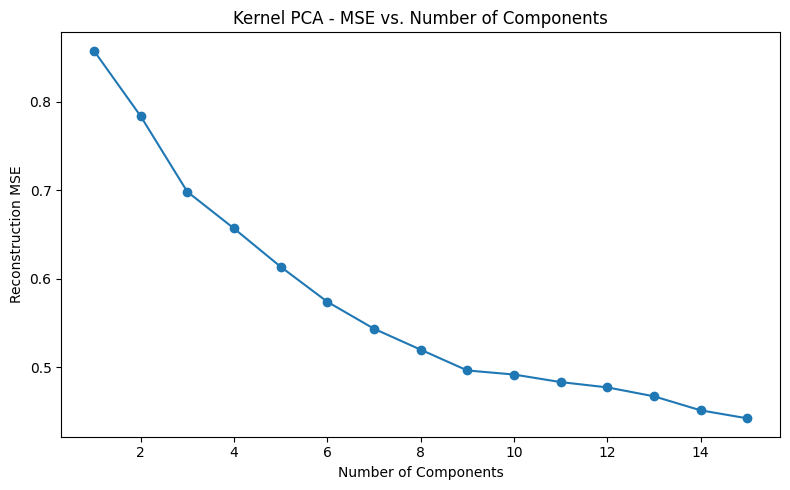

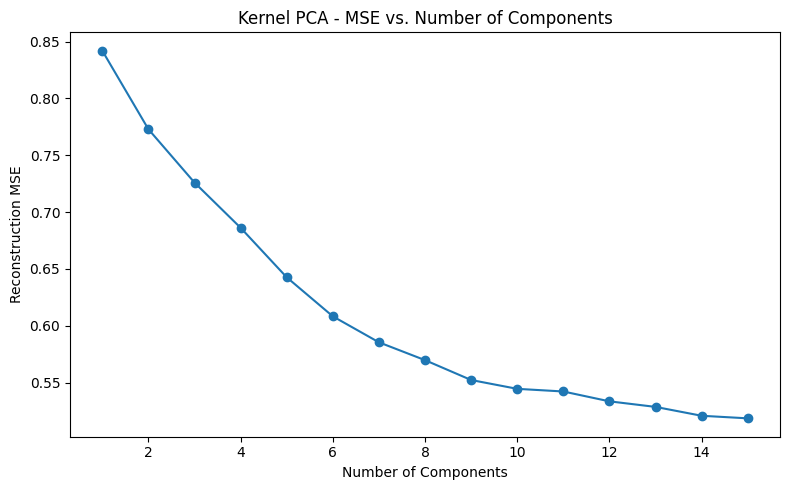

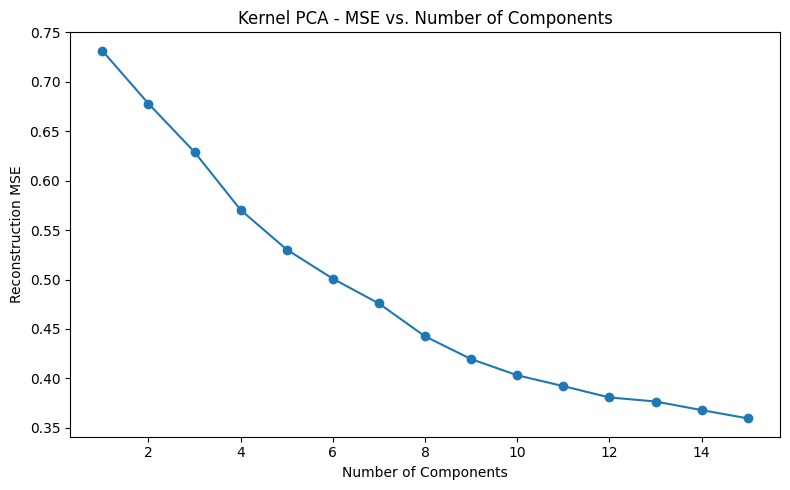

In [4]:
from reduction.kPCA import kpca, plot_kpca_mse_vs_pc

plot_kpca_mse_vs_pc(X_c1)
plot_kpca_mse_vs_pc(X_c2)
plot_kpca_mse_vs_pc(X)

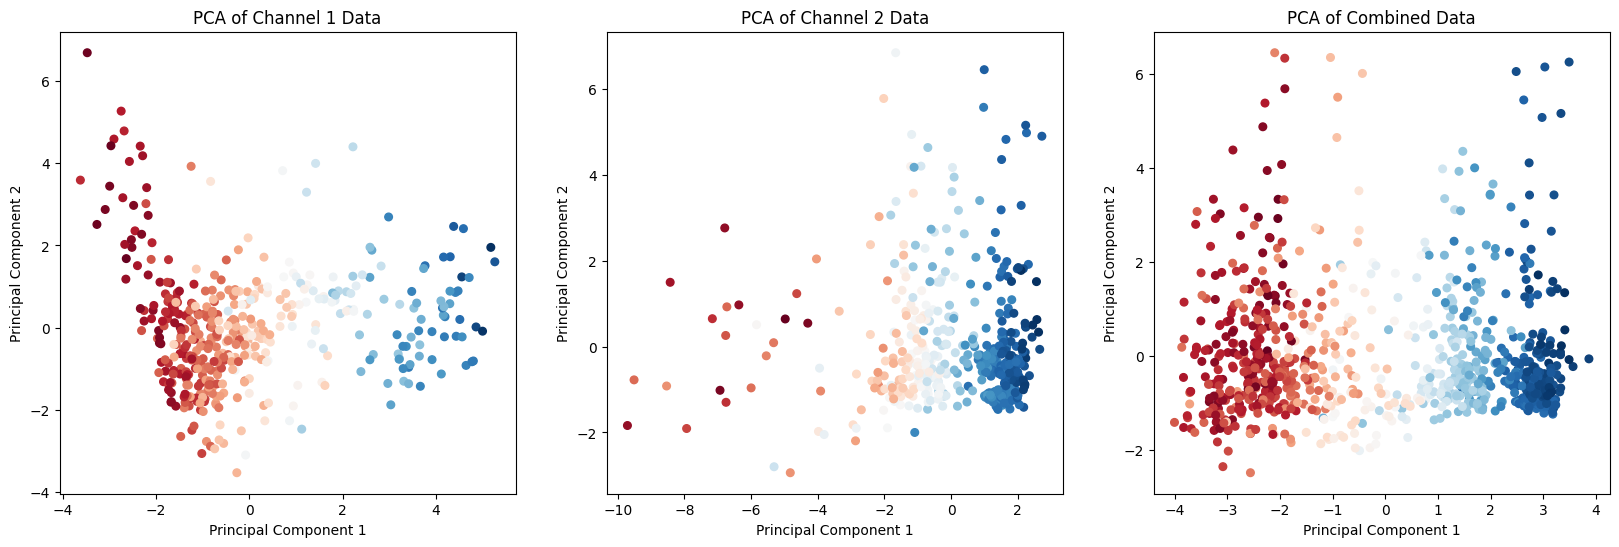

In [30]:
n_components = 12
X_c1_PCA = pca(X_c1, n_components=n_components)
X_c2_PCA = pca(X_c2, n_components=n_components)
X_PCA = pca(X, n_components=n_components)

metric = 4
# 3, 4, 5, 8, (11),
# Color by first column of df_c1
# plt.figure(figsize=(10, 6))

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].set_title("PCA of Channel 1 Data")
axs[0].set_xlabel("Principal Component 1")
axs[0].set_ylabel("Principal Component 2")
axs[0].scatter(
    X_c1_PCA[:, 0], X_c1_PCA[:, 1], c=df_c1.iloc[:, metric], cmap="RdBu", s=30
)

axs[1].set_title("PCA of Channel 2 Data")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")
axs[1].scatter(
    X_c2_PCA[:, 0], X_c2_PCA[:, 1], c=df_c2.iloc[:, metric], cmap="RdBu", s=30
)

axs[2].set_title("PCA of Combined Data")
axs[2].set_xlabel("Principal Component 1")
axs[2].set_ylabel("Principal Component 2")
axs[2].scatter(X_PCA[:, 0], X_PCA[:, 1], c=df.iloc[:, metric], cmap="RdBu", s=30)

plt.show()

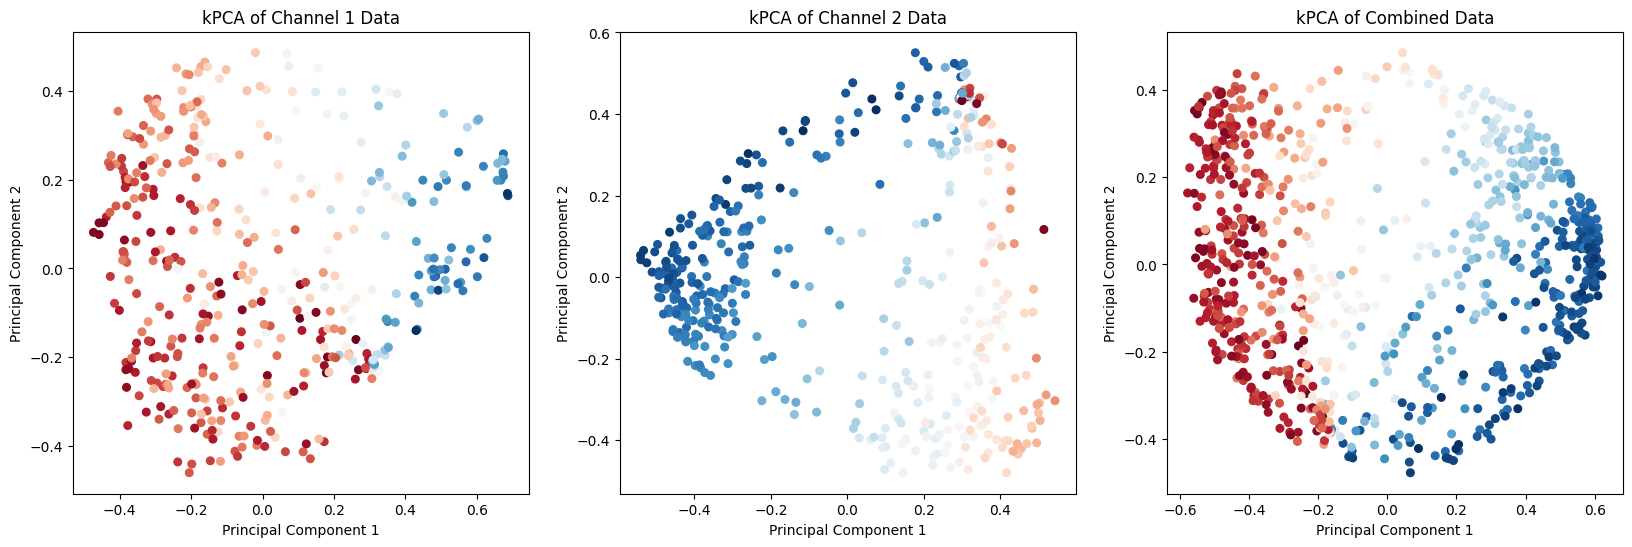

In [31]:
from reduction.kPCA import kpca, plot_kpca_mse_vs_pc

n_components = 9
X_c1_kPCA = kpca(X_c1, n_components=n_components)
X_c2_kPCA = kpca(X_c2, n_components=n_components)
X_kPCA = kpca(X, n_components=n_components)

# Color by first column of df_c1
# plt.figure(figsize=(10, 6))

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].set_title("kPCA of Channel 1 Data")
axs[0].set_xlabel("Principal Component 1")
axs[0].set_ylabel("Principal Component 2")
axs[0].scatter(
    X_c1_kPCA[:, 0], X_c1_kPCA[:, 1], c=df_c1.iloc[:, metric], cmap="RdBu", s=30
)

axs[1].set_title("kPCA of Channel 2 Data")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")
axs[1].scatter(
    X_c2_kPCA[:, 0], X_c2_kPCA[:, 1], c=df_c2.iloc[:, metric], cmap="RdBu", s=30
)

axs[2].set_title("kPCA of Combined Data")
axs[2].set_xlabel("Principal Component 1")
axs[2].set_ylabel("Principal Component 2")
axs[2].scatter(X_kPCA[:, 0], X_kPCA[:, 1], c=df.iloc[:, metric], cmap="RdBu", s=30)

plt.show()

In [32]:
from reduction.compare import evaluate_embeddings


results = evaluate_embeddings(X_c1, X_c1_PCA, X_c1_kPCA)
results = evaluate_embeddings(X_c2, X_c2_PCA, X_c2_kPCA)
results = evaluate_embeddings(X, X_PCA, X_kPCA)

Distance preservation (Spearman ρ, ↑ better):
  PCA  : 0.9960
  kPCA : 0.3812

K‑NN overlap (k=10, ↑ better):
  PCA  : 0.8581
  kPCA : 0.5778

🏆  **PCA embedding wins** (lower rank total)
Distance preservation (Spearman ρ, ↑ better):
  PCA  : 0.9985
  kPCA : 0.5836

K‑NN overlap (k=10, ↑ better):
  PCA  : 0.8799
  kPCA : 0.6297

🏆  **PCA embedding wins** (lower rank total)
Distance preservation (Spearman ρ, ↑ better):
  PCA  : 0.9962
  kPCA : 0.4914

K‑NN overlap (k=10, ↑ better):
  PCA  : 0.8310
  kPCA : 0.5072

🏆  **PCA embedding wins** (lower rank total)


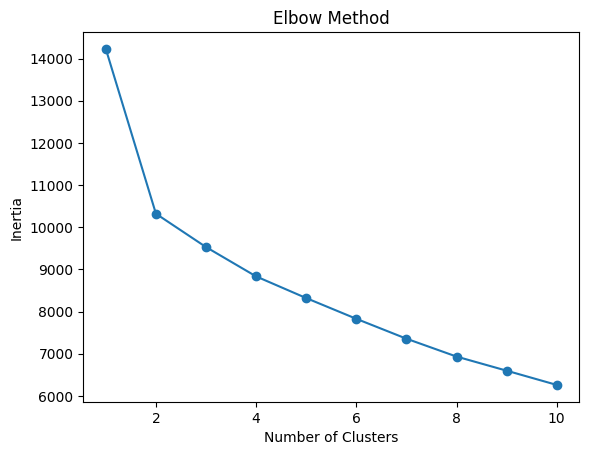

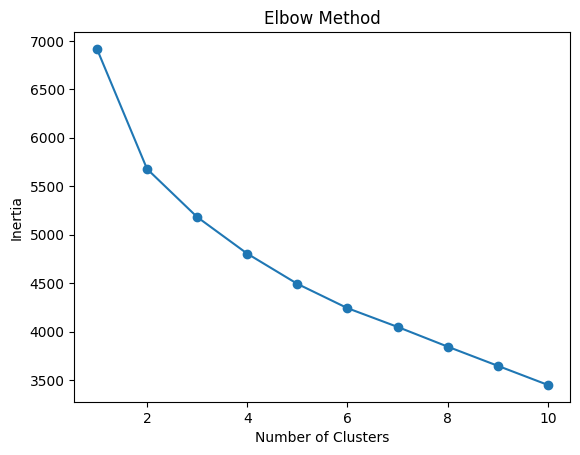

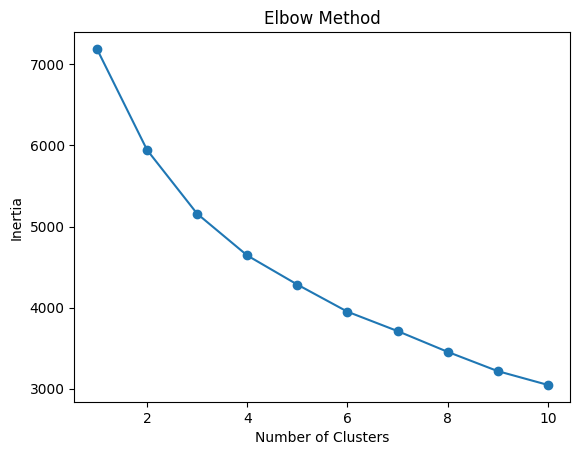

In [34]:
from clustering.kmeans import plot_kmeans_elbow

plot_kmeans_elbow(X_PCA, max_k=10)
plot_kmeans_elbow(X_c1_PCA, max_k=10)
plot_kmeans_elbow(X_c2_PCA, max_k=10)

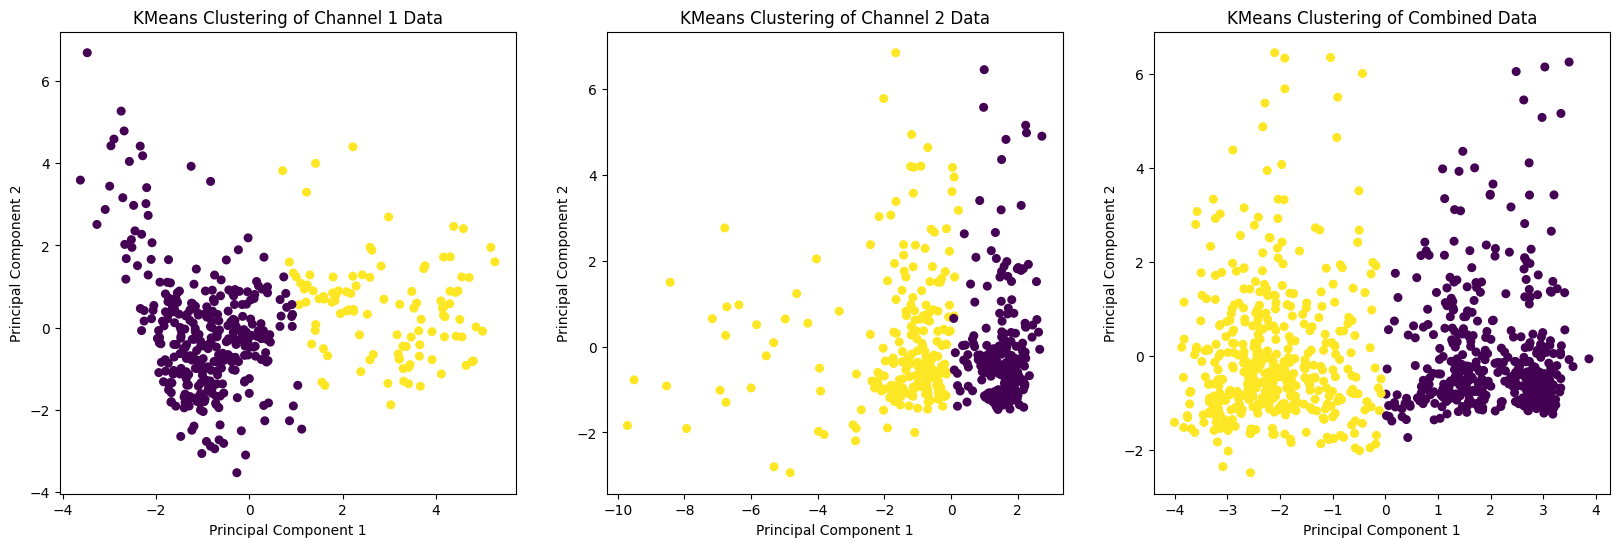

In [53]:
from clustering.kmeans import kmeans

k = 2
model, df_c1["cluster"] = kmeans(X_c1_PCA, k=k)
model, df_c2["cluster"] = kmeans(X_c2_PCA, k=k)
model, df["cluster"] = kmeans(X_PCA, k=k)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].set_title("KMeans Clustering of Channel 1 Data")
axs[0].set_xlabel("Principal Component 1")
axs[0].set_ylabel("Principal Component 2")
axs[0].scatter(X_c1_PCA[:, 0], X_c1_PCA[:, 1], c=df_c1["cluster"], cmap="viridis", s=30)

axs[1].set_title("KMeans Clustering of Channel 2 Data")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")
axs[1].scatter(X_c2_PCA[:, 0], X_c2_PCA[:, 1], c=df_c2["cluster"], cmap="viridis", s=30)

axs[2].set_title("KMeans Clustering of Combined Data")
axs[2].set_xlabel("Principal Component 1")
axs[2].set_ylabel("Principal Component 2")
axs[2].scatter(X_PCA[:, 0], X_PCA[:, 1], c=df["cluster"], cmap="viridis", s=30)

plt.show()

In [58]:
df["cluster"].unique()

array([0, 1], dtype=int32)

Cluster 0 has 447 points
Name: TX, Concentration: 5.0
Using TX color: #003366
Name: TX, Concentration: 0.5
Using TX color: #cce6ff
Name: TX, Concentration: 0.5
Using TX color: #cce6ff
Name: TX, Concentration: 0.5
Using TX color: #cce6ff
Name: TX, Concentration: 0.5
Using TX color: #cce6ff
Name: TX, Concentration: 0.5
Using TX color: #cce6ff
Name: TX, Concentration: 0.5
Using TX color: #cce6ff
Name: TX, Concentration: 0.5
Using TX color: #cce6ff
Name: TX, Concentration: 0.5
Using TX color: #cce6ff
Name: TX, Concentration: 0.5
Using TX color: #cce6ff
Name: TX, Concentration: 0.5
Using TX color: #cce6ff
Name: TX, Concentration: 0.5
Using TX color: #cce6ff
Name: TX, Concentration: 0.5
Using TX color: #cce6ff
Name: TX, Concentration: 0.5
Using TX color: #cce6ff
Name: TX, Concentration: 0.5
Using TX color: #cce6ff
Name: TX, Concentration: 0.5
Using TX color: #cce6ff
Name: TX, Concentration: 0.5
Using TX color: #cce6ff
Name: TX, Concentration: 0.5
Using TX color: #cce6ff
Name: TX, Concentrati

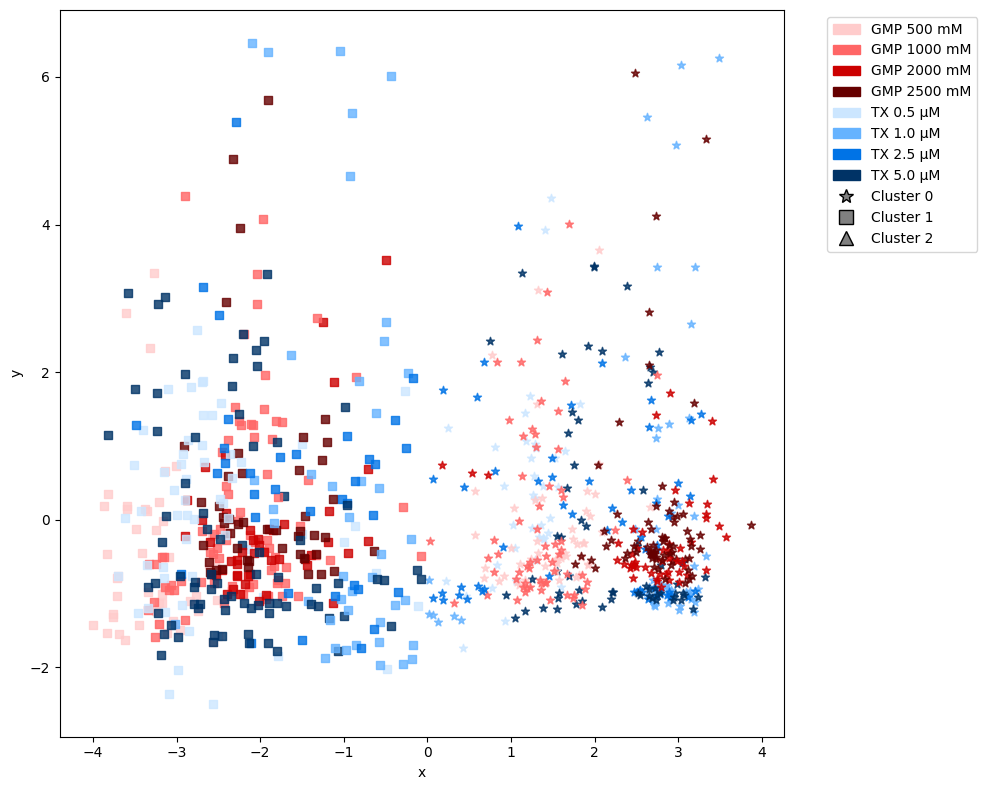

In [63]:
# Color + marker mapping
cluster_markers = {0: "*", 1: "s", 2: "^"}
gmp_color_map = {500: "#ffcccc", 1000: "#ff6666", 2000: "#cc0000", 2500: "#660000"}
tx_color_map = {0.5: "#cce6ff", 1.0: "#66b3ff", 2.5: "#0073e6", 5.0: "#003366"}

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for cluster_id in sorted(df["cluster"].unique()):
    marker = cluster_markers.get(cluster_id, "x")
    cluster_df = df[df["cluster"] == cluster_id]
    print(f"Cluster {cluster_id} has {len(cluster_df)} points")

    for idx, row in cluster_df.iterrows():
        # x, y = row["UMAP_X"], row["UMAP_Y"]
        x, y = X_PCA[idx, 0], X_PCA[idx, 1]
        name = row.get("stab_name", "")
        conc = row.get("stab_conc_uM", None)
        print(f"Name: {name}, Concentration: {conc}")

        if name == "GMP" and int(conc) in gmp_color_map:
            color = gmp_color_map[conc]
            print(f"Using GMP color: {color}")
        elif name == "TX" and conc in tx_color_map:
            color = tx_color_map[conc]
            print(f"Using TX color: {color}")
        else:
            color = "gray"

        plt.scatter(x, y, color=color, marker=marker, alpha=0.8)

# plt.show()
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

legend_elements = (
    [
        mpatches.Patch(color=color, label=f"GMP {c} mM")
        for c, color in gmp_color_map.items()
    ]
    + [
        mpatches.Patch(color=color, label=f"TX {c} µM")
        for c, color in tx_color_map.items()
    ]
    + [
        Line2D(
            [0],
            [0],
            marker=mk,
            color="w",
            label=f"Cluster {cid}",
            markerfacecolor="gray",
            markersize=10,
            markeredgecolor="black",
        )
        for cid, mk in cluster_markers.items()
    ]
)

plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("x")
plt.ylabel("y")
# plt.xlim(-35, 35)
# plt.ylim(-35, 35)
# plt.title(f"K-Means Clustering (k={k_opt}) {title_suffix}")
# plt.grid(True)
plt.tight_layout()
plt.show()